In [1]:
import numpy as np
import torch
from sklearn.manifold import TSNE
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
    

Num Images:  74


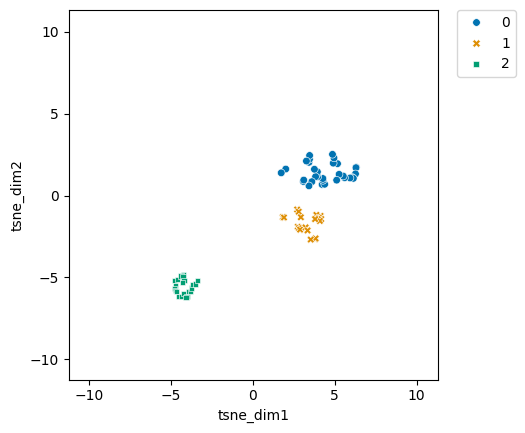

In [2]:
# loading eval results ---------------
X = np.load("./vis/feat_array.npy") # do_streamed_inference from SOLIDER-REID/processor/processor.py
Y = np.load("./vis/pid_array.npy")
C = np.load("./vis/cid_array.npy")
f = open("./vis/path_list.txt", 'r')
img_path_list = f.readlines()
f.close()
print("Num Images: ", len(img_path_list))
num_img, num_dim = X.shape
assert len(img_path_list)==num_img

max_img = 4000
X = X[:max_img, :]
Y = Y[:max_img]

 
# Pid visualization --------------------------------------------------------------------------------
n_components = 2  # To get TSNE embedding with 2 dimensions
tsne = TSNE(n_components)
tsne_result = tsne.fit_transform(X)
tsne_result.shape
# Plot the result of our TSNE with the label color coded
tsne_result_df = pd.DataFrame({"tsne_dim1": tsne_result[:,0], "tsne_dim2": tsne_result[:,1], "label": Y})
fig, ax = plt.subplots(1)
sns.scatterplot(x="tsne_dim1", y="tsne_dim2", hue="label", palette="colorblind", style="label", data=tsne_result_df, ax=ax, s=30)
lim = (tsne_result.min()-5, tsne_result.max()+5)
ax.set_xlim(lim)
ax.set_ylim(lim)
ax.set_aspect("equal")
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)
plt.savefig("vis/V1_data_pid", facecolor='w', bbox_inches="tight", pad_inches=0.1, transparent=True, dpi=500)
# print(Y)
# breakpoint()# A lot of the stuff here is about making the plot look pretty and not TSNE
